In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import datetime
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


- First, a look at the data

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
duplist = customer_df.duplicated()
duplist.unique()

array([False])

In [5]:
for column in customer_df.columns:
    s = customer_df.iloc[:,0]
    print(column, s.str.isspace().sum())

Customer 0
State 0
Customer Lifetime Value 0
Response 0
Coverage 0
Education 0
Effective To Date 0
EmploymentStatus 0
Gender 0
Income 0
Location Code 0
Marital Status 0
Monthly Premium Auto 0
Months Since Last Claim 0
Months Since Policy Inception 0
Number of Open Complaints 0
Number of Policies 0
Policy Type 0
Policy 0
Renew Offer Type 0
Sales Channel 0
Total Claim Amount 0
Vehicle Class 0
Vehicle Size 0


- There are no NaNs, duplicate values or white spaces in the set

In [6]:
cols = [col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns = cols

In [7]:
# customer has to be dropped
customer_df = customer_df.drop('customer', axis = 1)

#### **Application of chi2-test to determine the dependency or lack thereof between 2 categorical variables**

In [8]:
# the chi2-test will be performed for 2 variables that are suspected not to be independent
data_crosstab = pd.crosstab(customer_df['policy_type'], customer_df['policy'], margins = False)
data_crosstab

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


*As expected groups of 3 categories from policy correspond only to one respective category from policy_type each time*

In [9]:
data_crosstab.shape

(3, 9)

In [10]:
# calculating the degrees of freedom (n_rows-1)*(n_columns-1)
(3 - 1) * (9 - 1)

16

In [11]:
chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstab, correction=False)   # since degrees of freedom != 1, correction = False

print("Chi2 value:",round(chi2,2))
print("p-value:",p_value)
print("Degrees of freedom:",dof)
print("Expected frequencies:")
pd.DataFrame(expected_freq, columns=data_crosstab.columns, index=data_crosstab.index)

Chi2 value: 18268.0
p-value: 0.0
Degrees of freedom: 16
Expected frequencies:


policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,77.349683,128.197942,218.475148,267.168820,457.203416,738.161594,14.220276,35.335231,31.887891
Personal Auto,266.793519,442.178673,753.561638,921.515218,1576.980074,2546.057368,49.048391,121.877819,109.987300
Special Auto,14.856799,24.623385,41.963214,51.315962,87.816510,141.781038,2.731333,6.786950,6.124808


*With dof = 16, a-value = 0.05 and chi2 = 18268:*
- critical chi2 = 26.296 --> critical chi2 < chi2
- p-value < a-value

**--> null Hypothesis Ho is rejected**

*One of the 2 columns can be dropped. To decide which one, more tests can be run.*

[Text(0.5, 0, 'POLICY'), Text(0, 0.5, 'Total Claim Amount ($)')]

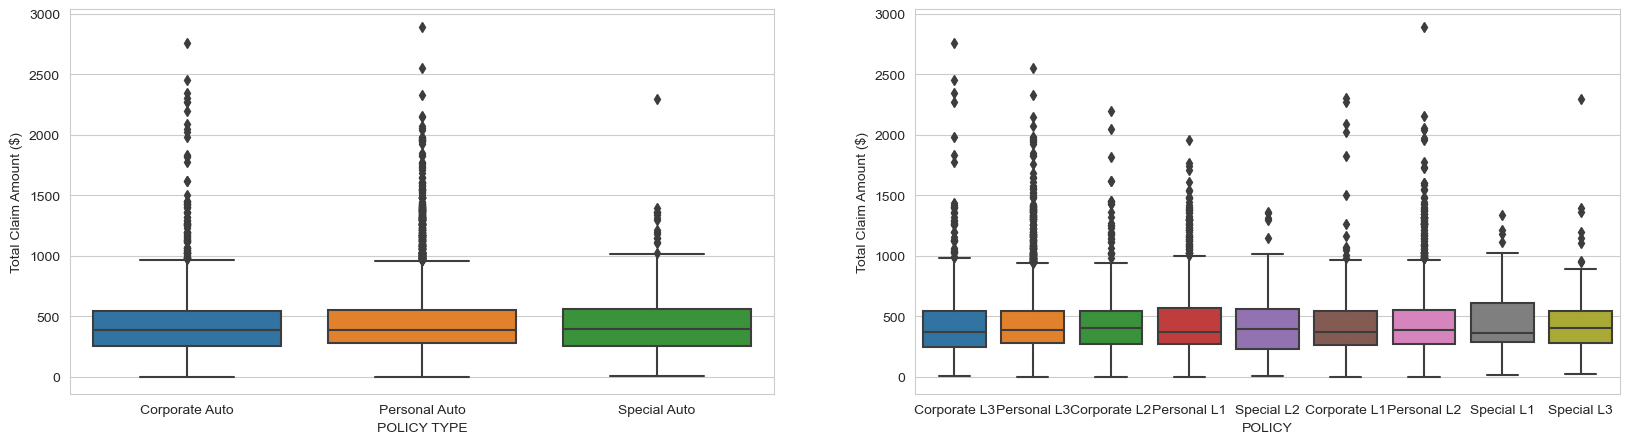

In [12]:
# checking distribution and statistics metrics using boxplots and plotting the categoricals by the target variable
plt.rcParams['figure.figsize'] = 20,5
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

sns.boxplot(x = customer_df['policy_type'], y = customer_df['total_claim_amount'], ax = ax1).set(xlabel = 'POLICY TYPE', ylabel = 'Total Claim Amount ($)')
sns.boxplot(x = customer_df['policy'], y = customer_df['total_claim_amount'], ax = ax2).set(xlabel = 'POLICY', ylabel = 'Total Claim Amount ($)')

In [13]:
customer_df.groupby('policy')['total_claim_amount'].describe()[['min', 'mean', '50%', 'max']].round(2)

,min,mean,50%,max
policy,,,,
Corporate L1,0.10,437.79,374.02,2306.51
Corporate L2,1.33,439.18,407.68,2201.33
Corporate L3,3.20,422.46,370.51,2759.79
Personal L1,1.59,441.06,369.72,1961.16
Personal L2,0.42,433.76,384.00,2893.24
Personal L3,0.38,433.24,384.00,2552.34
Special L1,13.16,463.24,364.90,1336.93
Special L2,8.08,432.60,396.05,1361.99
Special L3,22.57,439.04,407.17,2294.63


In [14]:
customer_df.groupby('policy_type')['total_claim_amount'].describe()[['min', 'mean', '50%', 'max']].round(2)

,min,mean,50%,max
policy_type,,,,
Corporate Auto,0.10,430.31,384.00,2759.79
Personal Auto,0.38,434.83,383.17,2893.24
Special Auto,8.08,440.47,397.06,2294.63


In [15]:
#### As explained in lab feature extraction:
# policy_type was going to be checked for its potential redundancy in relation to policy
# the tables above confirm that suspicion and show that only a very small variation can be observed among the separate categories of policy
### However in the case of policy:
# Corporate L2: median = 407.8, which is the highest of all categories,
# Special L1: from table greatest value for mean and lowest for median, from the boxplot very few and less widespread outliers compared to the rest categories
# Special L2 not particularly interesting based on the metrics above, but also with very few and closely positioned outliers
### --> policy_type will be dropped, policy will remain

In [16]:
customer_df = customer_df.drop('policy_type', axis = 1)

### 1. Outlier removal

In [17]:
numerical_df = customer_df.select_dtypes(np.number)

In [18]:
len(numerical_df.columns)

8

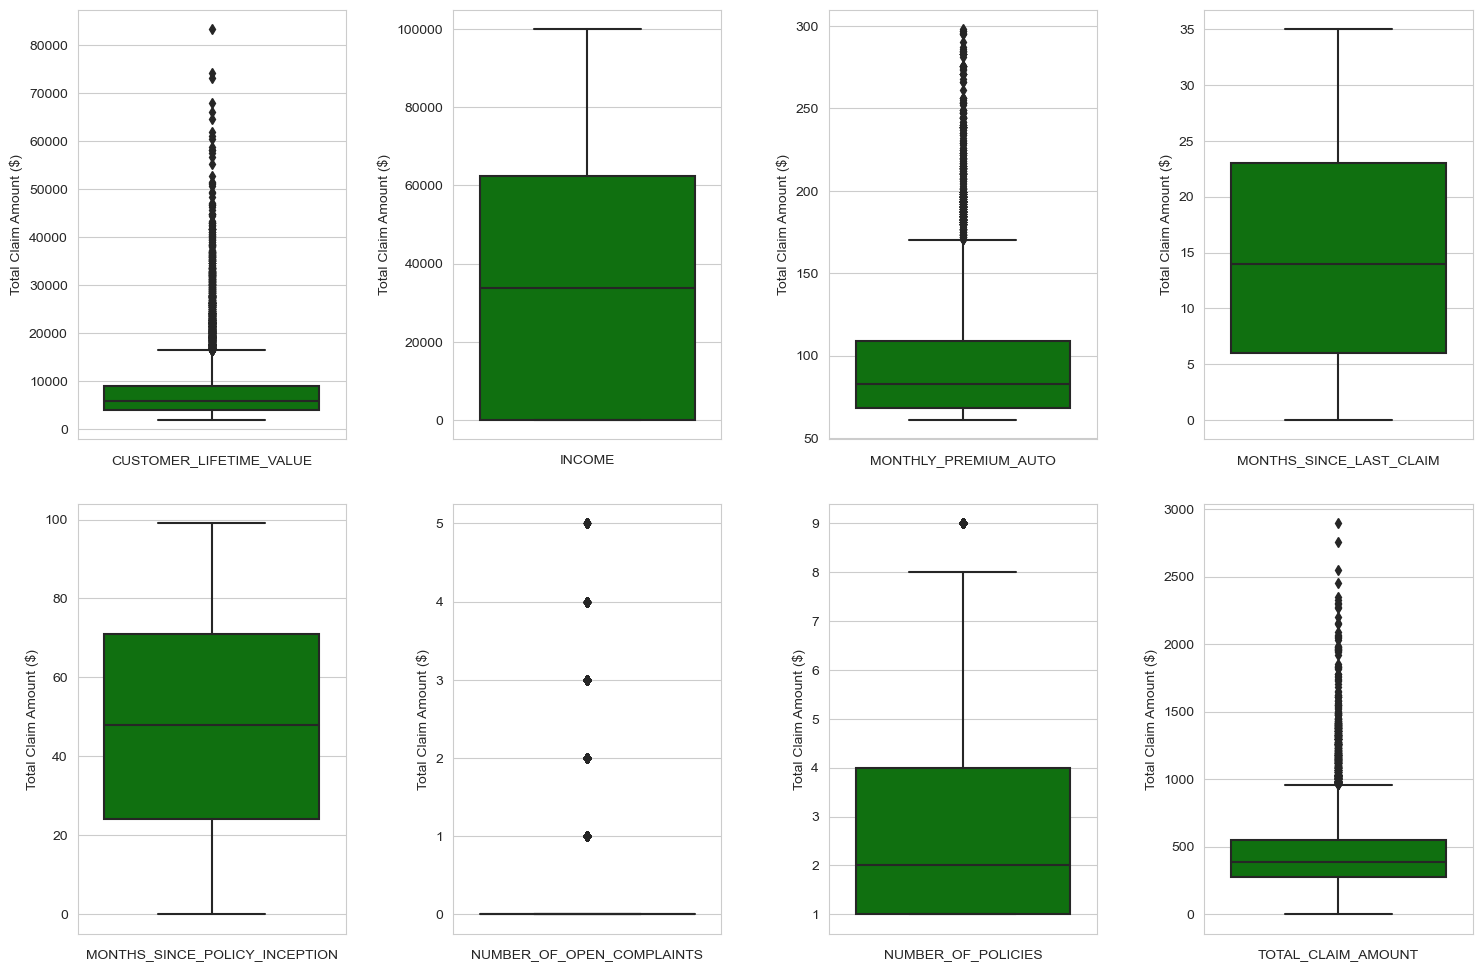

In [19]:
# 8 graphs need to be plotted to check for outliers in the numerical_df
fig, axes = plt.subplots(2,4, figsize = (18,12))
plt.subplots_adjust(wspace = 0.4, hspace=0.15)

for col, ax in zip(numerical_df.columns, axes.flat):
    sns.boxplot(y = numerical_df[col], color = 'green', orient = 'h', ax = ax).set(xlabel = col.upper(), ylabel = 'Total Claim Amount ($)')
plt.show()

- To treat: customer_lifetime_value, monthy_premium_auto, number_of_policies, total_claim_amount
- number_of_open_complaints: it doesn't make sense to remove outliers

In [20]:
# function for outlier removal
def outlier_splicer_3(df, column, whis):
    iqr = np.percentile(df[column],75) - np.percentile(df[column],25)
    upper_limit = np.percentile(df[column],75) + whis*iqr
    lower_limit = np.percentile(df[column],25) - whis*iqr
    df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [21]:
numerical_df = outlier_splicer_3(numerical_df, 'customer_lifetime_value', 6)    # whis already tested in previous lab
customer_df = outlier_splicer_3(customer_df, 'customer_lifetime_value', 6)  # creating frame of reference to later apply the changes to categorical_df

In [22]:
numerical_df = outlier_splicer_3(numerical_df, 'total_claim_amount', 6) # whis already tested in previous lab
customer_df = outlier_splicer_3(customer_df, 'total_claim_amount', 6)

<AxesSubplot:xlabel='number_of_policies'>

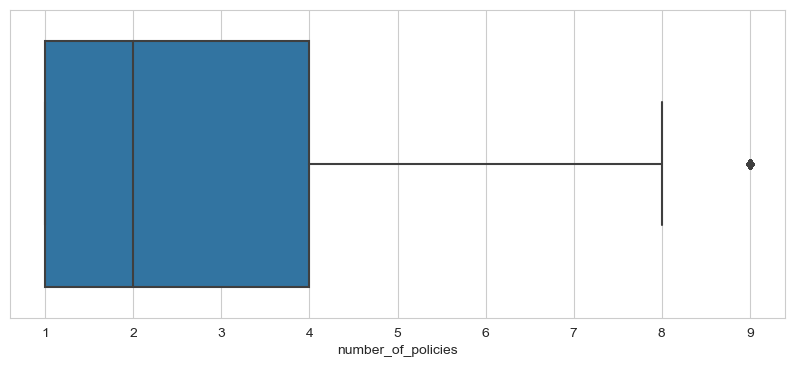

In [23]:
plt.rcParams['figure.figsize'] = 10, 4
sns.boxplot(numerical_df['number_of_policies'], whis = 1.5)

In [24]:
numerical_df.shape

(9060, 8)

In [25]:
testit = numerical_df[['number_of_policies', 'monthly_premium_auto']]
#testit = outlier_splicer_3(testit, 'number_of_policies', 1.5)
testit.shape

(9060, 2)

- Removal of outliers from number_of_policies removes too many rows. It will not be applied in numerical_df or customer_df

<AxesSubplot:xlabel='monthly_premium_auto'>

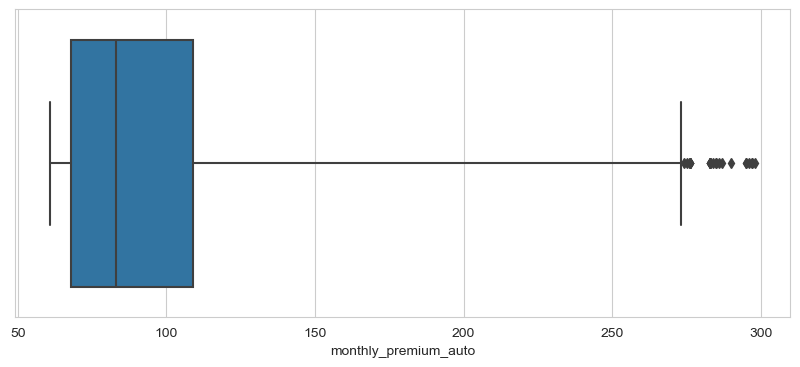

In [26]:
sns.boxplot(numerical_df['monthly_premium_auto'], whis = 4)

In [27]:
testit = outlier_splicer_3(testit, 'monthly_premium_auto', 4)
testit.shape

(9033, 2)

In [29]:
numerical_df = outlier_splicer_3(numerical_df, 'monthly_premium_auto', 4)
customer_df = outlier_splicer_3(customer_df, 'monthly_premium_auto', 4)
numerical_df.shape

(9033, 8)

*101 rows were removed in total*

### 3. Copy of the dataframe

In [31]:
for_wr = customer_df.copy()

### 4. Normalizing continuous variables

- Continuous variables in customer_df are: customer_lifetime_value, income, total_claim_amount

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

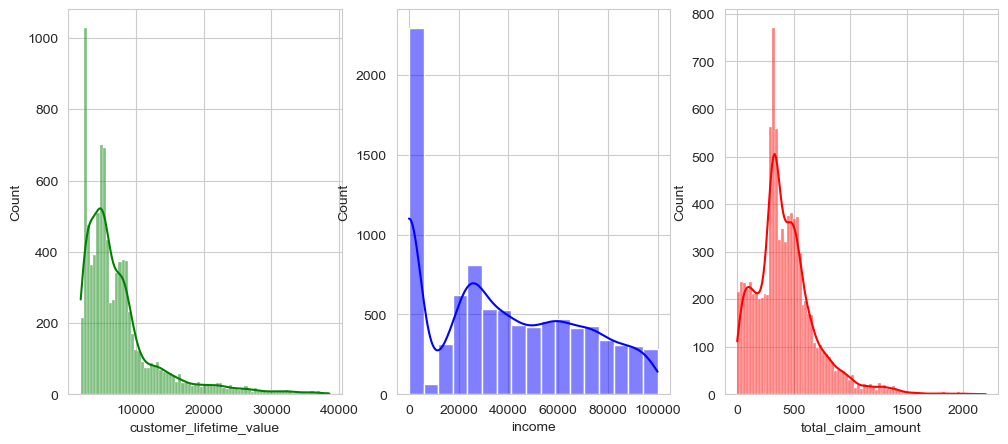

In [32]:
# first, a look at their distributions

plt.rcParams['figure.figsize'] = [12,5]

plt.subplot(1, 3, 1)
sns.histplot(for_wr['customer_lifetime_value'], color = 'green', kde = True)

plt.subplot(1, 3, 2)
sns.histplot(for_wr['income'], color = 'blue', kde = True)

plt.subplot(1, 3, 3)
sns.histplot(for_wr['total_claim_amount'], color = 'red', kde = True)

In [33]:
def minmax_t(df, column):
    transformer = MinMaxScaler().fit(df[[column]])
    col_minmax = transformer.transform(df[[column]])
    return col_minmax

In [34]:
for_wr['customer_lifetime_value'] = minmax_t(for_wr, 'customer_lifetime_value')
for_wr['income'] = minmax_t(for_wr, 'income')
for_wr['total_claim_amount'] = minmax_t(for_wr, 'total_claim_amount')

In [33]:
for_wr

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,0.023617,No,Basic,Bachelor,2/24/11,Employed,F,0.562847,Suburban,Married,69,32,5,0,1,Corporate L3,Offer1,Agent,0.174772,Two-Door Car,Medsize
1,Arizona,0.138659,No,Extended,Bachelor,1/31/11,Unemployed,F,0.000000,Suburban,Single,94,13,42,0,8,Personal L3,Offer3,Agent,0.513970,Four-Door Car,Medsize
2,Nevada,0.299867,No,Premium,Bachelor,2/19/11,Employed,F,0.487763,Suburban,Married,108,18,38,0,2,Personal L3,Offer1,Agent,0.257299,Two-Door Car,Medsize
3,California,0.156841,No,Basic,Bachelor,1/20/11,Unemployed,M,0.000000,Suburban,Married,106,18,65,0,7,Corporate L2,Offer1,Call Center,0.240676,SUV,Medsize
4,Washington,0.024986,No,Basic,Bachelor,2/3/11,Employed,M,0.438443,Rural,Single,73,12,44,0,1,Personal L1,Offer1,Agent,0.062707,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,0.586885,No,Basic,Bachelor,2/10/11,Employed,M,0.719547,Urban,Married,73,18,89,0,2,Personal L1,Offer2,Web,0.090011,Four-Door Car,Medsize
9130,California,0.032703,Yes,Extended,College,2/12/11,Employed,F,0.216081,Suburban,Divorced,79,14,28,0,1,Corporate L3,Offer1,Branch,0.172222,Four-Door Car,Medsize
9131,California,0.170976,No,Extended,Bachelor,2/6/11,Unemployed,M,0.000000,Suburban,Single,85,9,37,3,2,Corporate L2,Offer1,Branch,0.359202,Four-Door Car,Medsize
9132,California,0.153528,No,Extended,College,2/3/11,Employed,M,0.219452,Suburban,Married,96,34,3,0,3,Personal L2,Offer3,Branch,0.313961,Four-Door Car,Large


<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

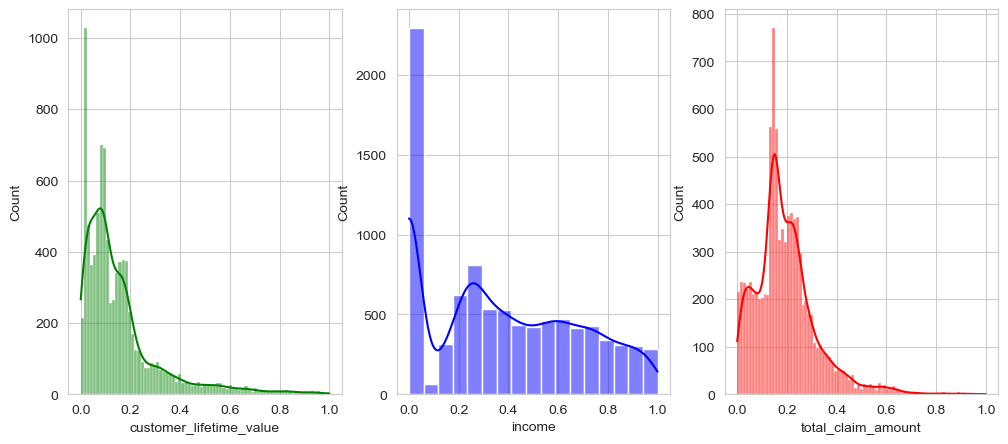

In [35]:
# now a look at the result of the fitting to their distribution

plt.rcParams['figure.figsize'] = [12,5]

plt.subplot(1, 3, 1)
sns.histplot(for_wr['customer_lifetime_value'], color = 'green', kde = True)

plt.subplot(1, 3, 2)
sns.histplot(for_wr['income'], color = 'blue', kde = True)

plt.subplot(1, 3, 3)
sns.histplot(for_wr['total_claim_amount'], color = 'red', kde = True)

*The minmax transformation has only affected the scale of the distributions and not the distributions themselves.*

In [38]:
# maybe the standardisation of the features would bear better results

for_wr['customer_lifetime_value'] = customer_df['customer_lifetime_value']  # drawing the columns directly from customer_df, since they are unchanged there
for_wr['income'] = customer_df['income']
for_wr['total_claim_amount'] = customer_df['total_claim_amount']

def standardiser(df, column):
    transformer = StandardScaler().fit(df[[column]])
    df[column] = transformer.transform(df[[column]])
    return df[column]

for_wr['customer_lifetime_value'] = standardiser(for_wr, 'customer_lifetime_value')
for_wr['income'] = standardiser(for_wr, 'income')
for_wr['total_claim_amount'] = standardiser(for_wr, 'total_claim_amount')

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

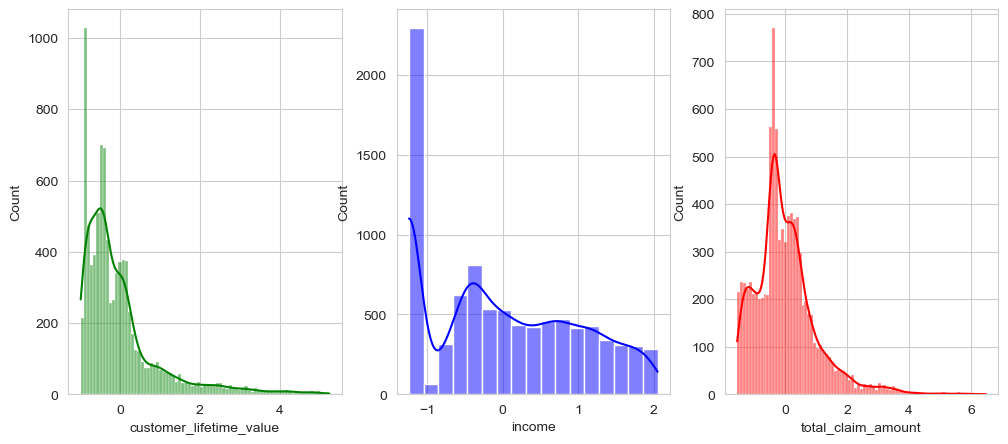

In [39]:
# now a look at the result of the fitting to their distribution

plt.rcParams['figure.figsize'] = [12,5]

plt.subplot(1, 3, 1)
sns.histplot(for_wr['customer_lifetime_value'], color = 'green', kde = True)

plt.subplot(1, 3, 2)
sns.histplot(for_wr['income'], color = 'blue', kde = True)

plt.subplot(1, 3, 3)
sns.histplot(for_wr['total_claim_amount'], color = 'red', kde = True)

*Still no important change. Next up, a log transformation will be applied.*

In [66]:
des_df = for_wr[['customer_lifetime_value', 'income', 'total_claim_amount']]    # since a group of columns from a df cannot be used with .describe(), a new one is created for that purpose
des_df.describe()

,customer_lifetime_value,income,total_claim_amount
count,9033.000000,9033.000000,9033.000000
mean,8.730924,10.693392,5.779275
std,0.630772,0.472111,0.911928
min,7.548560,9.214034,-2.312565
25%,8.285142,10.443542,5.598432
50%,8.654732,10.693392,5.938064
75%,9.086494,11.040920,6.296004
max,10.559600,11.512735,7.696816


In [73]:
for_wr['customer_lifetime_value'] = customer_df['customer_lifetime_value']
for_wr['income'] = customer_df['income']
for_wr['total_claim_amount'] = customer_df['total_claim_amount']

def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

def log_former(df, column, metric):
    df[column] = df[column].apply(lambda x : log_transfom_clean(x))
    df[column] = df[column].fillna(metric(df[column]))     
    return df[column]

# mean and median are practically the same as shown above. Since centralising the elements is important, the median will be selected for it
for_wr['customer_lifetime_value'] = log_former(for_wr, 'customer_lifetime_value', np.median)
for_wr['income'] = log_former(for_wr, 'income', np.mean)    # in this case the mean works better, because it makes the distribution look more normal
for_wr['total_claim_amount'] = log_former(for_wr, 'total_claim_amount', np.median)

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

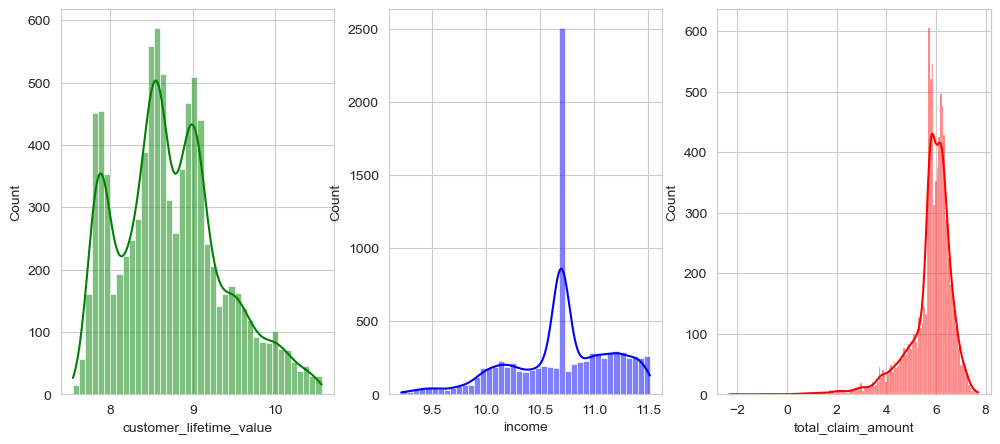

In [74]:
plt.rcParams['figure.figsize'] = [12,5]

plt.subplot(1, 3, 1)
sns.histplot(for_wr['customer_lifetime_value'], color = 'green', kde = True)

plt.subplot(1, 3, 2)
sns.histplot(for_wr['income'], color = 'blue', kde = True)

plt.subplot(1, 3, 3)
sns.histplot(for_wr['total_claim_amount'], color = 'red', kde = True)

### 5. Encoding categoricals

- Following the instructions from the exercise statement

In [75]:
for_wr = pd.get_dummies(for_wr, columns = ['state', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'gender', 'response'], drop_first= True)
for_wr

,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,gender_M,response_Yes
0,7.924260,Basic,Bachelor,2/24/11,Employed,10.937988,Suburban,69,32,5,0,1,5.952753,Medsize,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,8.850738,Extended,Bachelor,1/31/11,Unemployed,10.693392,Suburban,94,13,42,0,8,7.031268,Medsize,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,9.464008,Premium,Bachelor,2/19/11,Employed,10.794809,Suburban,108,18,38,0,2,6.339428,Medsize,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,8.941920,Basic,Bachelor,1/20/11,Unemployed,10.693392,Suburban,106,18,65,0,7,6.272653,Medsize,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,7.942253,Basic,Bachelor,2/3/11,Employed,10.688211,Rural,73,12,44,0,1,4.928202,Medsize,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,10.060747,Basic,Bachelor,2/10/11,Employed,11.183602,Urban,73,18,89,0,2,5.289452,Medsize,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
9130,8.038031,Extended,College,2/12/11,Employed,9.980634,Suburban,79,14,28,0,1,5.938064,Medsize,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9131,9.007476,Extended,Bachelor,2/6/11,Unemployed,10.693392,Suburban,85,9,37,3,2,6.673026,Medsize,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9132,8.925912,Extended,College,2/3/11,Employed,9.996112,Suburban,96,34,3,0,3,6.538429,Large,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


- In ordinal encoding, the number appointed to a value matters. Arranging categories hierarchicaly and manual encoding is the preferable way to go.

In [76]:
for_wr.coverage.unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [77]:
for_wr["coverage"] = for_wr["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [78]:
for_wr.employmentstatus.unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [79]:
for_wr["employmentstatus"] = for_wr["employmentstatus"].map({"Retired" : 0, "Disabled" : 1, "Unemployed" : 2, "Medical Leave": 3, "Employed": 4})

In [80]:
for_wr.location_code.unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [81]:
for_wr["location_code"] = for_wr["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})

In [82]:
for_wr.vehicle_size.unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [83]:
for_wr["vehicle_size"] = for_wr["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [84]:
for_wr.education.unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [85]:
for_wr["education"] = for_wr["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master": 3, "Doctor": 4})

In [86]:
# variable number_of_open_complaints can be turned to a dummy with values 0 for no complaints and 1 for any complaints
def clean_nc(x):
    if x == 0:
        return x
    elif x > 0:
        return 1

for_wr['number_of_open_complaints'] = for_wr['number_of_open_complaints'].apply(lambda x : clean_nc(x))

In [87]:
for_wr

,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,income,location_code,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,gender_M,response_Yes
0,7.924260,0,2,2/24/11,4,10.937988,1,69,32,5,0,1,5.952753,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,8.850738,1,2,1/31/11,2,10.693392,1,94,13,42,0,8,7.031268,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,9.464008,2,2,2/19/11,4,10.794809,1,108,18,38,0,2,6.339428,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,8.941920,0,2,1/20/11,2,10.693392,1,106,18,65,0,7,6.272653,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,7.942253,0,2,2/3/11,4,10.688211,0,73,12,44,0,1,4.928202,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,10.060747,0,2,2/10/11,4,11.183602,2,73,18,89,0,2,5.289452,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
9130,8.038031,1,1,2/12/11,4,9.980634,1,79,14,28,0,1,5.938064,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
9131,9.007476,1,2,2/6/11,2,10.693392,1,85,9,37,1,2,6.673026,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9132,8.925912,1,1,2/3/11,4,9.996112,1,96,34,3,0,3,6.538429,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


### 5. Time variable datatype

In [88]:
# it is currently considered string, so it will have to be changed to datetime
for_wr['effective_to_date'] = for_wr['effective_to_date'].str.replace('/', '')
for_wr['effective_to_date'] = pd.to_datetime(for_wr['effective_to_date'].astype(str), format = '%m%d%y')

In [89]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


### 6. Checking for categoricals that were left out of encoding process

#### Those would be response, gender and education, but they were already accounted for and encoded thusly (I really wanted to use this word) at the end of exercise 5:
- response: onehot
- gender: onehot
- education: ordinal